##  Importing Required Packages


In [81]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

##  Loading dataset

In [122]:
iris = load_iris()
x = iris.data[:, :2]   # ONLY 2 features
y = iris.target

## Normalization 

In [127]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(x) # only numerical

In [129]:
print(X_scaled)

[[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]
 [-0.53717756  1.93979142]
 [-1.50652052  0.78880759]
 [-1.02184904  0.78880759]
 [-1.74885626 -0.36217625]
 [-1.14301691  0.09821729]
 [-0.53717756  1.47939788]
 [-1.26418478  0.78880759]
 [-1.26418478 -0.13197948]
 [-1.87002413 -0.13197948]
 [-0.05250608  2.16998818]
 [-0.17367395  3.09077525]
 [-0.53717756  1.93979142]
 [-0.90068117  1.01900435]
 [-0.17367395  1.70959465]
 [-0.90068117  1.70959465]
 [-0.53717756  0.78880759]
 [-0.90068117  1.47939788]
 [-1.50652052  1.24920112]
 [-0.90068117  0.55861082]
 [-1.26418478  0.78880759]
 [-1.02184904 -0.13197948]
 [-1.02184904  0.78880759]
 [-0.7795133   1.01900435]
 [-0.7795133   0.78880759]
 [-1.38535265  0.32841405]
 [-1.26418478  0.09821729]
 [-0.53717756  0.78880759]
 [-0.7795133   2.40018495]
 [-0.41600969  2.63038172]
 [-1.14301691  0.09821729]
 [-1.02184904  0.32841405]
 [-0.41600969  1.01900435]
 

##  splitting data into train and test sets 

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)



## Train KNN model on the training data

In [135]:
k = 5  # initial number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)



## Make predictions on the test set

In [135]:

y_pred = knn.predict(X_test)


## Evaluate performance (accuracy)

In [138]:

accuracy = accuracy_score(y_test, y_pred)
print(f"K={k}, Test Accuracy: {accuracy:.2f}")


K=5, Test Accuracy: 0.80


## Plot decision boundaries and classification results

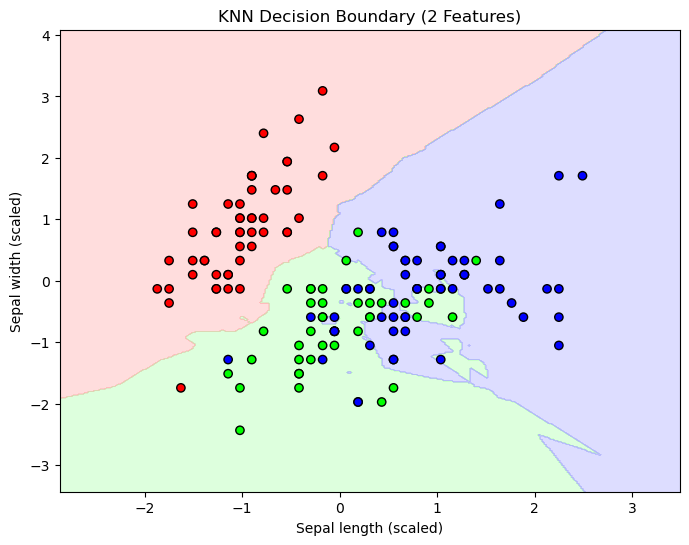

In [142]:
def plot_decision_boundary(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.xlabel("Sepal length (scaled)")
    plt.ylabel("Sepal width (scaled)")
    plt.title("KNN Decision Boundary (2 Features)")
    plt.show()

plot_decision_boundary(X_scaled, y, knn)


## Experiment with different K values to find the relationship between accuracy and the number of neighbors (k)

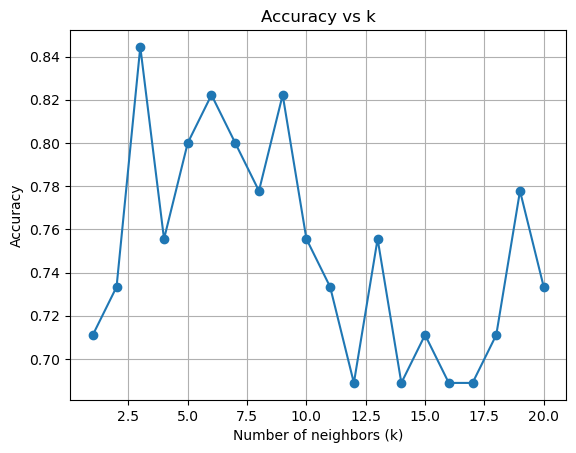

In [155]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.grid(True)
plt.show()

## 	The relationship between k and training set size

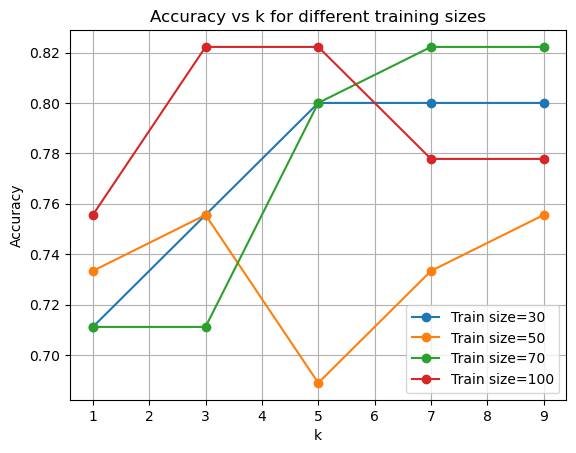

In [158]:
train_sizes = [30, 50, 70, 100]
k_values = [1, 3, 5, 7, 9]

for size in train_sizes:
    X_sub, _, y_sub, _ = train_test_split(
        X_train, y_train, train_size=size, random_state=42
    )

    acc_list = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_sub, y_sub)
        acc_list.append(accuracy_score(y_test, knn.predict(X_test)))

    plt.plot(k_values, acc_list, marker='o', label=f"Train size={size}")

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k for different training sizes")
plt.legend()
plt.grid(True)
plt.show()